In [1]:
import os
import numpy as np
import pandas as pd
import joblib
import json
import tensorflow as tf
import gc

import matplotlib.pyplot as plt
%matplotlib inline  

import mplhep as hep
plt.style.use(hep.style.ROOT)

dev = True

#import atlas_mpl_style as ampl
#ampl.use_atlas_style()

## Carga de Dados Boosted

In [2]:
def open_boosted(path= ""):
    '''
    This function will get a .npz file and transform into a pandas DataFrame. 
    The .npz has three types of data: float, int and bool this function will concatenate these features and reorder them.

    Arguments:
    path (str) - the full path to .npz file
    '''
    # open the file
    d = dict(np.load(path, allow_pickle=True))   
    #print(d.keys()) 
    # create a list of temporary dataframes that should be concateneted into a final one
    df_list = []
    for itype in ['float', 'int', 'bool', 'object']:
        df_list.append(pd.DataFrame(data=d['data_%s' %itype], columns=d['features_%s' %itype]))
    # concat the list
    df = pd.concat(df_list, axis=1)
    # return the DataFrame with ordered features.
    df = df[d['ordered_features']]
    # add the target information
    df['target'] = d['target']
    df['et_bin'] = d['etBinIdx']
    df['eta_bin'] = d['etaBinIdx']
    # remove the list of DataFrame and collect into garbage collector
    del df_list, d
    gc.collect()
    
    #rename some columns to match in analysis
    rename_columns={'el_et': 'et','el_eta':'eta',
                    'el_phi':'phi','el_rhad1':'rhad1',
                    'el_rhad':'rhad','el_f3':'f3',
                    'el_weta2':'weta2','el_rphi':'rphi',
                    'el_reta':'reta','el_wtots1':'wtots1',
                    'el_eratio':'eratio','el_f1':'f1',
                    'el_hastrack':'hastrack',
                    'el_numberOfBLayerHits':'numberOfBLayerHits',
                    'el_numberOfPixelHits':'numberOfPixelHits',
                    'el_numberOfTRTHits':'numberOfTRTHits',
                    'el_d0':'d0','el_d0significance':'d0significance',
                    'el_eProbabilityHT':'eProbabilityHT',
                    'el_trans_TRT_PID':'trans_TRT_PID',
                    'el_deltaEta1':'deltaEta1','el_deltaPhi2':'deltaPhi2',
                    'el_deltaPhi2Rescaled':'deltaPhi2Rescaled',
                    'el_deltaPOverP':'deltaPOverP',
                   }
    df.rename(columns=rename_columns, inplace=True)
    return df

In [3]:
# my pc path
#data_path = '/media/natmourajr/Backup/Work/CERN/Qualify/cern_data/Zee_boosted/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins_et4_eta0.npz'
# LPS path

if dev:
    data_path = '/home/natmourajr/Workspace/CERN/Qualify/data/Zee_boosted/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins_et4_eta0.npz'
    df_boosted = open_boosted(data_path)
else:
    df_list = []
    data_path = '/home/natmourajr/Workspace/CERN/Qualify/data/Zee_boosted/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins'
    for file in os.listdir(data_path):
        if file.endswith(".npz"):
            file_path = os.path.join(data_path, file)
            print('Processing: ', file_path)
            df_list.append(open_boosted(file_path))
    #data_path = '/home/natmourajr/Workspace/CERN/Qualify/data/Zee_boosted/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins_et4_eta0.npz'
    df_boosted = pd.concat(df_list)

In [4]:
df_boosted.columns

Index(['RunNumber', 'avgmu', 'trig_L2_cl_et', 'trig_L2_cl_eta',
       'trig_L2_cl_phi', 'trig_L2_cl_reta', 'trig_L2_cl_ehad1',
       'trig_L2_cl_eratio', 'trig_L2_cl_f1', 'trig_L2_cl_f3',
       ...
       'trig_L2_cl_lhtight_et0to12', 'trig_L2_cl_lhtight_et12to20',
       'trig_L2_cl_lhtight_et22toInf', 'trig_L2_el_cut_pt0to15',
       'trig_L2_el_cut_pt15to20', 'trig_L2_el_cut_pt20to50',
       'trig_L2_el_cut_pt50toInf', 'target', 'et_bin', 'eta_bin'],
      dtype='object', length=187)

In [5]:
df_boosted.shape

(39199, 187)

# Carga de dados Zee

In [6]:
def open_zee(path= ""):
    '''
    This function will get a .npz file and transform into a pandas DataFrame. 
    The .npz has three types of data: float, int and bool this function will concatenate these features and reorder them.

    Arguments:
    path (str) - the full path to .npz file
    '''
    # open the file
    d = dict(np.load(path, allow_pickle=True))
    #print(d.keys())
    df = pd.DataFrame(d['data'],columns=d["features"])
    
    df['target'] = d['target']
    df['et_bin'] = d['etBinIdx']
    df['eta_bin'] = d['etaBinIdx']
    return df

In [7]:
# my pc path
#data_path = '/media/natmourajr/Backup/Work/CERN/Qualify/cern_data/Zee_boosted/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins_et0_eta0.npz'
# LPS path
#df = open_zee(data_path)

if dev:
    # LPS path
    data_path = '/home/natmourajr/Workspace/CERN/Qualify/data/Zee/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97_et4_eta0.npz'
    df_zee = open_zee(data_path)
else:
    df_list = []
    data_path = '/home/natmourajr/Workspace/CERN/Qualify/data/Zee/data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97'
    for file in os.listdir(data_path):
        if file.endswith(".npz"):
            file_path = os.path.join(data_path, file)
            print('Processing: ', file_path)
            df_list.append(open_zee(file_path))
    df_zee = pd.concat(df_list)

In [8]:
df_zee.columns.to_list()

['avgmu',
 'L2Calo_ring_0',
 'L2Calo_ring_1',
 'L2Calo_ring_2',
 'L2Calo_ring_3',
 'L2Calo_ring_4',
 'L2Calo_ring_5',
 'L2Calo_ring_6',
 'L2Calo_ring_7',
 'L2Calo_ring_8',
 'L2Calo_ring_9',
 'L2Calo_ring_10',
 'L2Calo_ring_11',
 'L2Calo_ring_12',
 'L2Calo_ring_13',
 'L2Calo_ring_14',
 'L2Calo_ring_15',
 'L2Calo_ring_16',
 'L2Calo_ring_17',
 'L2Calo_ring_18',
 'L2Calo_ring_19',
 'L2Calo_ring_20',
 'L2Calo_ring_21',
 'L2Calo_ring_22',
 'L2Calo_ring_23',
 'L2Calo_ring_24',
 'L2Calo_ring_25',
 'L2Calo_ring_26',
 'L2Calo_ring_27',
 'L2Calo_ring_28',
 'L2Calo_ring_29',
 'L2Calo_ring_30',
 'L2Calo_ring_31',
 'L2Calo_ring_32',
 'L2Calo_ring_33',
 'L2Calo_ring_34',
 'L2Calo_ring_35',
 'L2Calo_ring_36',
 'L2Calo_ring_37',
 'L2Calo_ring_38',
 'L2Calo_ring_39',
 'L2Calo_ring_40',
 'L2Calo_ring_41',
 'L2Calo_ring_42',
 'L2Calo_ring_43',
 'L2Calo_ring_44',
 'L2Calo_ring_45',
 'L2Calo_ring_46',
 'L2Calo_ring_47',
 'L2Calo_ring_48',
 'L2Calo_ring_49',
 'L2Calo_ring_50',
 'L2Calo_ring_51',
 'L2Calo_rin

## Unificando os dados
Como os dados vieram de banco de dados diferentes, eu vou unificar os mesmos e adicionar uma coluna de is_boosted. Esta última será 1 quando os dados forem boosted e 0 quando não for boosted

In [9]:
# mudando os nomes das colunas "padrão geradas na aquisição"
df_zee.columns = [c.replace("L2Calo", "trig_L2_cl") for c in list(df_zee.columns)]

In [10]:
# criando uma coluna para diferenciar
df_boosted['is_boosted'] = 1
df_zee['is_boosted'] = 0

In [11]:
df_boosted.head()

,RunNumber,avgmu,trig_L2_cl_et,trig_L2_cl_eta,trig_L2_cl_phi,trig_L2_cl_reta,trig_L2_cl_ehad1,trig_L2_cl_eratio,trig_L2_cl_f1,trig_L2_cl_f3,...,trig_L2_cl_lhtight_et12to20,trig_L2_cl_lhtight_et22toInf,trig_L2_el_cut_pt0to15,trig_L2_el_cut_pt15to20,trig_L2_el_cut_pt20to50,trig_L2_el_cut_pt50toInf,target,et_bin,eta_bin,is_boosted
0,310000,28.49,2.384941e+05,-0.607868,-2.707992,0.972986,144.720963,0.979702,0.108998,0.009339,...,True,True,True,True,True,True,1.0,4,0,1
1,310000,46.50,9.523698e+05,-0.316026,1.304594,0.973886,4731.140625,0.993113,0.101171,0.013992,...,True,True,True,True,True,True,1.0,4,0,1
2,310000,60.50,1.361326e+06,0.747472,-0.162229,0.965323,3911.929199,1.011388,0.238911,0.004983,...,True,True,True,True,True,True,1.0,4,0,1
3,310000,43.50,6.687857e+05,0.108909,-2.976708,0.970706,2144.790527,0.995141,0.166586,0.010647,...,True,True,True,True,True,True,1.0,4,0,1
4,310000,38.50,1.286490e+06,-0.224995,-2.689110,0.970724,7945.402344,0.994471,0.064834,0.018838,...,True,True,True,True,True,True,1.0,4,0,1


In [12]:
df_zee.head()

,avgmu,trig_L2_cl_ring_0,trig_L2_cl_ring_1,trig_L2_cl_ring_2,trig_L2_cl_ring_3,trig_L2_cl_ring_4,trig_L2_cl_ring_5,trig_L2_cl_ring_6,trig_L2_cl_ring_7,trig_L2_cl_ring_8,...,el_lhloose,el_lhvloose,T0HLTElectronT2CaloTight,T0HLTElectronT2CaloMedium,T0HLTElectronT2CaloLoose,T0HLTElectronT2CaloVLoose,target,et_bin,eta_bin,is_boosted
0,31.459999,946.455200,297.285675,-162.731384,238.094727,-204.648712,112.230659,29.744968,43.871647,4150.571289,...,0.0,0.0,1.0,1.0,1.0,1.0,1,4,0,0
1,31.420000,1155.483643,231.537582,841.838196,-32.028019,317.318054,412.808563,19.779219,-101.355553,12582.793945,...,0.0,0.0,1.0,1.0,1.0,1.0,1,4,0,0
2,31.459999,2306.196045,123.935341,-92.987045,-264.076416,172.244553,-83.377022,109.801102,-15.553493,8039.985840,...,0.0,0.0,1.0,1.0,1.0,1.0,1,4,0,0
3,31.459999,1661.695190,311.053619,-193.597885,-127.421242,386.362854,156.423721,182.063248,-88.269615,6214.927246,...,0.0,0.0,1.0,1.0,1.0,1.0,1,4,0,0
4,31.459999,716.282349,572.603027,24.837866,-122.357193,-38.153748,-149.753250,205.552399,-74.376228,4822.833984,...,0.0,0.0,1.0,1.0,1.0,1.0,1,4,0,0


In [13]:
# Encontrando a interseção entre as listas de colunas
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))
analysis_columns = intersection(df_boosted.columns.to_list(),df_zee.columns.to_list())
analysis_columns.sort()
print(analysis_columns)

['avgmu', 'd0', 'd0significance', 'deltaEta1', 'deltaPhi2', 'deltaPhi2Rescaled', 'eProbabilityHT', 'el_lhloose', 'el_lhmedium', 'el_lhtight', 'el_lhvloose', 'eratio', 'et', 'et_bin', 'eta', 'eta_bin', 'f1', 'f3', 'hastrack', 'is_boosted', 'numberOfBLayerHits', 'numberOfPixelHits', 'numberOfTRTHits', 'phi', 'reta', 'rhad', 'rhad1', 'rphi', 'target', 'trans_TRT_PID', 'trig_L2_cl_e2tsts1', 'trig_L2_cl_ehad1', 'trig_L2_cl_eratio', 'trig_L2_cl_et', 'trig_L2_cl_eta', 'trig_L2_cl_f1', 'trig_L2_cl_f3', 'trig_L2_cl_phi', 'trig_L2_cl_reta', 'trig_L2_cl_ring_0', 'trig_L2_cl_ring_1', 'trig_L2_cl_ring_10', 'trig_L2_cl_ring_11', 'trig_L2_cl_ring_12', 'trig_L2_cl_ring_13', 'trig_L2_cl_ring_14', 'trig_L2_cl_ring_15', 'trig_L2_cl_ring_16', 'trig_L2_cl_ring_17', 'trig_L2_cl_ring_18', 'trig_L2_cl_ring_19', 'trig_L2_cl_ring_2', 'trig_L2_cl_ring_20', 'trig_L2_cl_ring_21', 'trig_L2_cl_ring_22', 'trig_L2_cl_ring_23', 'trig_L2_cl_ring_24', 'trig_L2_cl_ring_25', 'trig_L2_cl_ring_26', 'trig_L2_cl_ring_27', 'tri

In [14]:
# selecionando e concatenando os bancos
df_analysis = pd.concat([df_zee[analysis_columns],df_boosted[analysis_columns]])

In [15]:
df_analysis.head()

,avgmu,d0,d0significance,deltaEta1,deltaPhi2,deltaPhi2Rescaled,eProbabilityHT,el_lhloose,el_lhmedium,el_lhtight,...,trig_L2_cl_ring_94,trig_L2_cl_ring_95,trig_L2_cl_ring_96,trig_L2_cl_ring_97,trig_L2_cl_ring_98,trig_L2_cl_ring_99,trig_L2_cl_weta2,trig_L2_cl_wstot,weta2,wtots1
0,31.459999,0.006381,0.441381,0.000903,-0.002143,0.000070,0.727416,0.0,1.0,1.0,...,101.235756,-122.895493,0.000000,0.476002,46.172161,-63.784222,0.010072,2.258944,0.010075,1.968737
1,31.420000,0.011581,1.007181,-0.000692,-0.000934,-0.000143,0.488369,0.0,1.0,1.0,...,77.692551,750.557190,1.850015,6.937556,183.613983,28.675230,0.009233,2.008358,0.009244,1.725371
2,31.459999,0.002996,0.220593,-0.000647,-0.004100,0.002071,0.950302,0.0,1.0,1.0,...,555.436462,-155.855972,7.862563,41.625336,40.700329,33.300270,0.009734,1.816929,0.009696,1.711820
3,31.459999,0.011342,0.709146,0.000135,-0.001407,0.000166,0.600756,0.0,1.0,1.0,...,72.680809,128.551086,61.760662,68.622963,29.409840,23.037708,0.010380,2.270725,0.010357,2.100466
4,31.459999,0.002944,0.217445,0.000986,0.000961,0.000669,0.214959,0.0,1.0,1.0,...,2.908631,384.260071,-1.470492,7.842624,-15.195084,36.762299,0.008924,2.108190,0.008713,1.867609


## Adicionando a decisão da rede neural a todos os eventos

In [16]:
def add_tuning_decision(df, tuning_path, config_dict):
    #find et and eta bin
    idx = (df['et_bin']+df['eta_bin']).unique()[0]
    #print(idx)

    m_path = tuning_path
    m_model_path = os.path.join(m_path,config_dict["Model__path"][idx].replace('.onnx',''))
    with open(m_model_path + '.json', 'r') as f:
            sequential = json.load(f) 
    model = tf.keras.models.model_from_json(json.dumps(sequential, separators=(',', ':')))
    model.load_weights(m_model_path + '.h5')
    slope, offset = config_dict["Threshold__slope"][idx],config_dict["Threshold__offset"][idx]

    # ring list
    rings = ['trig_L2_cl_ring_%i' %(iring) for iring in range(100)] 

    def norm1( data ): 
            norms = np.abs( data.sum(axis=1) )
            norms[norms==0] = 1
            return data/norms[:,None] 
    df['nn_output_%s_%s'%(config_dict['__operation__'].lower(),config_dict['__version__'])] = model.predict(norm1(df[rings].values)) 
    df['thr_%s_%s' %(config_dict['__operation__'].lower(),config_dict['__version__'])] = df['avgmu']*slope + offset
    df['nn_decision_%s_%s' %(config_dict['__operation__'].lower(),config_dict['__version__'])] = 0
    df.loc[df['nn_output_%s_%s' %(config_dict['__operation__'].lower(),config_dict['__version__'])] > df['thr_%s_%s' %(config_dict['__operation__'].lower(),config_dict['__version__'])],'nn_decision_%s_%s' %(config_dict['__operation__'].lower(),config_dict['__version__'])] = 1 


In [17]:
# load tuning
tuning_root_path = '/home/natmourajr/Workspace/CERN/CERN-ATLAS-Qualify/analysis/tunings'
tuning_version = "TrigL2_20180125_v8"
tuning_path = os.path.join(tuning_root_path,tuning_version)

dev = False

if dev:
    tuning_op_pt = 'Tight' # Tight, Medium, Loose, VeryLoose
    tuning_file = "ElectronRinger%sTriggerConfig.json"%(tuning_op_pt)
    with open(os.path.join(tuning_path,tuning_file)) as f:
        conf = json.load(f)
    add_tuning_decision(df=df_analysis, tuning_path=tuning_path, config_dict=conf)
else:
    tuning_op_pts = ['Tight', 'Medium', 'Loose', 'VeryLoose']
    #tuning_op_pt = 'Tight' # Tight, Medium, Loose, VeryLoose
    for tuning_op_pt in tuning_op_pts:
        tuning_file = "ElectronRinger%sTriggerConfig.json"%(tuning_op_pt)
        with open(os.path.join(tuning_path,tuning_file)) as f:
            conf = json.load(f)
        add_tuning_decision(df=df_analysis, tuning_path=tuning_path, config_dict=conf)
dev = True

In [18]:
#add_tuning_decision(df=df_analysis, tuning_path=tuning_path, config_dict=conf)

In [19]:
df_filter = df_analysis.query('et_bin == 1 & el_lhloose == 1').copy(deep=True)
df_sgn = df_analysis.query('target == 1 & el_lhloose == 1').copy(deep=True)
df_bkg = df_analysis.query('is_boosted == 1 & target != 1 & el_lhloose == 1').copy(deep=True)
df_boosted = df_analysis.query('is_boosted == 1 & target == 1 & el_lhloose == 1').copy(deep=True)

Text(0, 1, 'Counts')

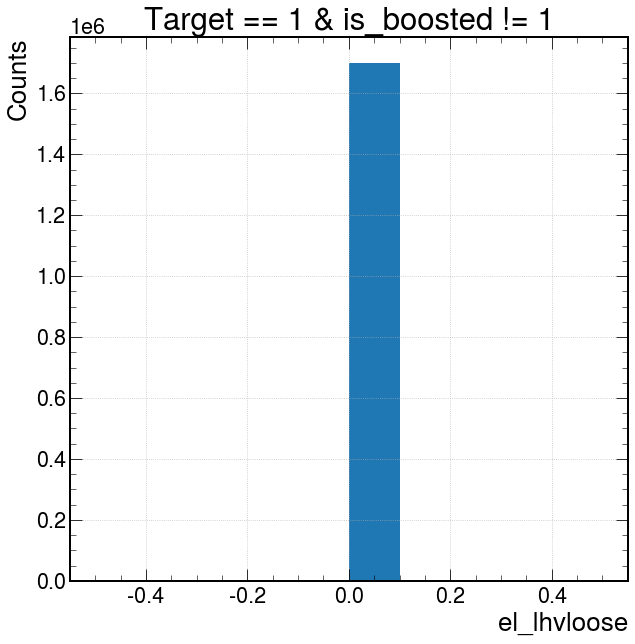

In [20]:
df_analysis[(df_analysis['target']==1)& (df_analysis['is_boosted']==0)]['el_lhvloose'].hist()
plt.title('Target == 1 & is_boosted != 1');
plt.xlabel('el_lhvloose')
plt.ylabel('Counts')

Text(0, 1, 'Counts')

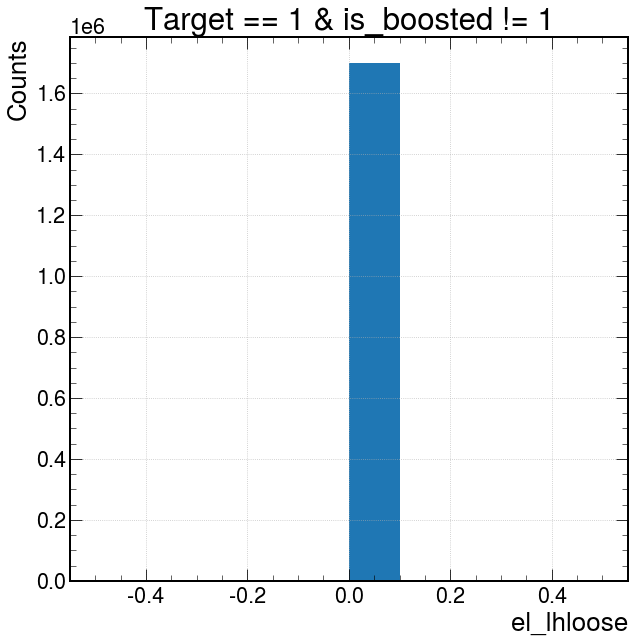

In [21]:
df_analysis[(df_analysis['target']==1)& (df_analysis['is_boosted']==0)]['el_lhloose'].hist()
plt.title('Target == 1 & is_boosted != 1');
plt.xlabel('el_lhloose')
plt.ylabel('Counts')

Text(0, 1, 'Counts')

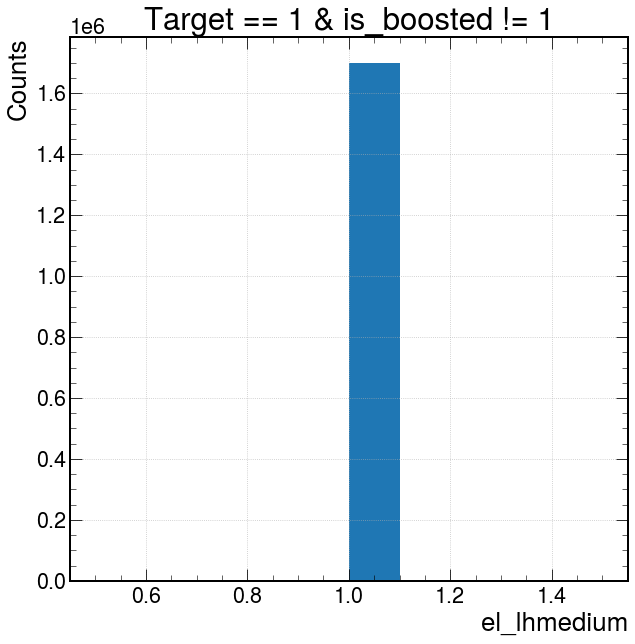

In [22]:
df_analysis[(df_analysis['target']==1)& (df_analysis['is_boosted']==0)]['el_lhmedium'].hist()
plt.title('Target == 1 & is_boosted != 1');
plt.xlabel('el_lhmedium')
plt.ylabel('Counts')

Text(0, 1, 'Counts')

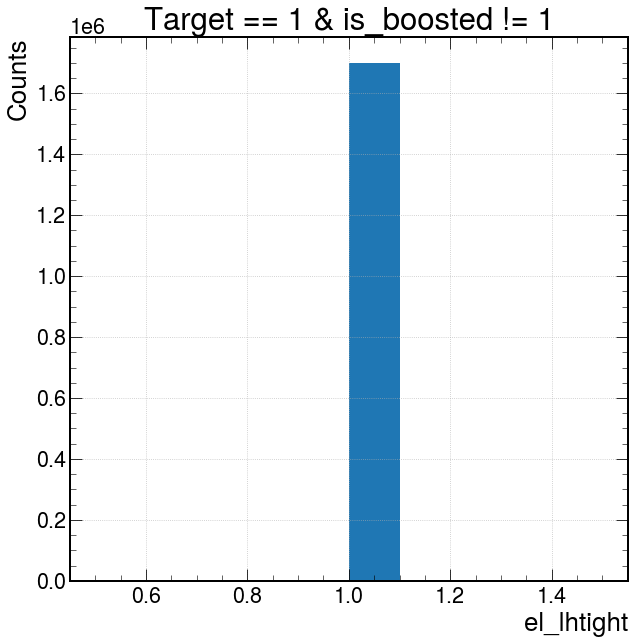

In [23]:
df_analysis[(df_analysis['target']==1)& (df_analysis['is_boosted']==0)]['el_lhtight'].hist()
plt.title('Target == 1 & is_boosted != 1');
plt.xlabel('el_lhtight')
plt.ylabel('Counts')

In [24]:
# plotar um histograma

def safe_div(a,b):
    if b == 0:
        return 0
    else:
        return float(a)/float(b)


variable = 'et'
etbins=[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 
        14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 
        26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 
        38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 
        50.0, 55.0, 60.0, 65.0, 70.0, 100.0]
multiplied_etbins = np.array(etbins)*1000

[all_bin_heights, all_bin_edges] = np.histogram(df_sgn[variable], bins=multiplied_etbins)
[acc_bin_heights, acc_bin_edges] = np.histogram(df_sgn[df_sgn['nn_decision_veryloose_v8']==1][variable], bins=multiplied_etbins)

print(acc_bin_heights)
print(all_bin_heights)

result = np.zeros_like(all_bin_heights, dtype=float)
for ibin, bin_value in enumerate(all_bin_heights):
    result[ibin] = safe_div(float(acc_bin_heights[ibin]),float(all_bin_heights[ibin]))

print(result)
#print(acc_bin_heights/all_bin_heights)
#hist, bin_edges = np.histogram(a, density=True)


[  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  21  35  48  65 596]
[   0    7    3    1    1    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    1    0    0    1    5   79   99  124
  159 1084]
[0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.26582278 0.35353535 0.38709677 0.40880503 0.5498155 ]


In [25]:
df_test = df_analysis.query('is_boosted == 0 & et_bin == 4 & eta_bin == 0')
print(df_test.shape)

(5469197, 155)


NameError: name 'get_trg_eff_per_variable' is not defined

In [ ]:
df_sgn = df_analysis.query('is_boosted == 0 & target == 1').copy(deep=True)
df_bkg = df_analysis.query('is_boosted == 0 & target != 1').copy(deep=True)
df_boosted = df_analysis.query('is_boosted == 1 & target == 1 & et_bin == 4').copy(deep=True)
# df_sgn = df_analysis.query('is_boosted == 0 & target == 1 & et_bin == 4 & eta_bin == 0').copy(deep=True)
# df_bkg = df_analysis.query('is_boosted == 0 & target != 1 & et_bin == 4 & eta_bin == 0').copy(deep=True)
# df_boosted = df_analysis.query('is_boosted == 1 & target == 1 & et_bin == 4 & eta_bin == 0').copy(deep=True)

In [ ]:
# plot um gráfico com duas figuras.
# a primeira é o número de eventos por bin
# a segunda é a eficiência por bin

from matplotlib import gridspec

# criar uma figura
figsize = (13,12)
nrows = 2
ncols = 1
fig = plt.figure(figsize=figsize)
    
# create grid for different subplots
spec = gridspec.GridSpec(ncols=1, nrows=2,
width_ratios=[1],
height_ratios=[2.5, 1],
wspace=0.0, hspace=0.1,)

ax  = fig.add_subplot(spec[0]) # big figure
ax1 = fig.add_subplot(spec[1]) # secondary axis
ax1.sharex(ax)

ax.tick_params(axis="x", colors="None")

data = [df_sgn, df_bkg, df_boosted]
labels = ['sgn','bkg', 'boosted']
colors = ['blue', 'red', 'green']

variable = 'et'

etbins=[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 
        14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 
        26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 
        38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 
        50.0, 55.0, 60.0, 65.0, 70.0, 100.0]

bins = np.array(etbins)*1000
#bins = 10

for idb, idata in enumerate(data):
    print('Processing data of dataset: %s'%(labels[idb]))
    [eff, var_qtd, ref_qtd, bins, 
     bins_center] = get_trg_eff_per_variable(df=idata,variable=variable,
                                             trigger_var='nn_decision_loose_v8',
                                             bins = bins)
    n, m_bins, patches = ax.hist(idata[variable], bins, density=False,
                                 color=colors[idb], alpha=1.0, 
                                 label=labels[idb], histtype='step', 
                                 lw=1.5)
    ax1.plot(bins_center,eff,'o',color=colors[idb], alpha=0.75, label=labels[idb])



In [ ]:
fig, ax = plt.sub